In [76]:
!pip install -q numpy pandas matplotlib seaborn scikit-learn nltk wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('C:/Users/Testing/Downloads/MLOps/MLOps-Sentiment-Analysis/resource/sentiment_data.csv')
df.head()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


In [9]:
df.shape

(241145, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241145 entries, 0 to 241144
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  241145 non-null  int64 
 1   Comment     240928 non-null  object
 2   Sentiment   241145 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB


In [15]:
df.sample()['Comment'].values

array(['election commission look urgency modis address nation fortnight lok sabha polls https shameless modi idiot respect law kicked'],
      dtype=object)

In [16]:
df.isnull().sum()

Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64

In [17]:
df[df['Comment'].isnull()]

,Unnamed: 0,Comment,Sentiment
1014,1017,NaN,1
4732,4748,NaN,1
7414,7437,NaN,2
7431,7454,NaN,1
7496,7519,NaN,1
...,...,...,...
223441,224219,NaN,1
228310,229088,NaN,2
233352,234130,NaN,1
235494,236272,NaN,1


In [18]:
df[df['Comment'].isnull()]['Sentiment'].value_counts()

Sentiment
1    195
2     13
0      9
Name: count, dtype: int64

In [19]:
df.dropna(inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

In [24]:
df[(df['Comment'].str.strip() == '')]

,Unnamed: 0,Comment,Sentiment


In [ ]:
# df = df[~(df['Comment'].str.strip() == '')]

In [26]:
# Convert the 'Comment' column to lowercase
df['Comment'] = df['Comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


In [29]:
df = df.drop(columns=['Unnamed: 0'])

In [30]:
df.columns

Index(['Comment', 'Sentiment'], dtype='object')

In [33]:
df = df.rename(columns={'Comment': 'comment', 'Sentiment': 'sentiment'})

In [36]:

df[df['comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]



,comment,sentiment


In [37]:
# Remove trailing and leading whitespaces from the 'comment' column
df['comment'] = df['comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [39]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,comment,sentiment


In [40]:
# Identify comments containing new line characters
comments_with_newline = df[df['comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,comment,sentiment


In [41]:
# Remove new line characters from the 'clean_comment' column
df['comment'] = df['comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['comment'].str.contains('\n')]
comments_with_newline_remaining

,comment,sentiment


EDA

<Axes: xlabel='sentiment', ylabel='count'>

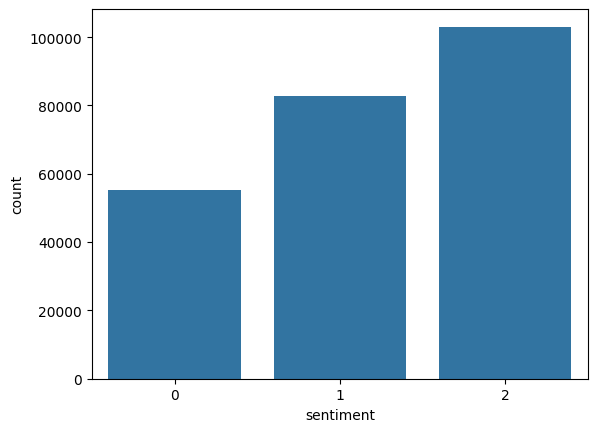

In [42]:
# Distribution of classes

sns.countplot(data=df, x='sentiment')

In [43]:
# frequency distribution of sentiments

df['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
2    42.77
1    34.36
0    22.87
Name: proportion, dtype: float64

In [44]:
# Word count in comments

df['word_count'] = df['comment'].apply(lambda x: len(x.split()))

In [45]:
df.sample(5)

,comment,sentiment,word_count
167512,watch official trailer modi subscribe erosnow ...,1,10
106579,modi handpicking shows thinking long term buil...,0,22
93140,attacking rahul gandhi without data correctaru...,2,13
25915,wanted take photo storm misplaced camera,1,6
218340,waiting last five years booked six years till ...,0,23


In [46]:
df['word_count'].describe()

count    240928.000000
mean         13.004694
std          10.224321
min           1.000000
25%           6.000000
50%          11.000000
75%          18.000000
max         742.000000
Name: word_count, dtype: float64

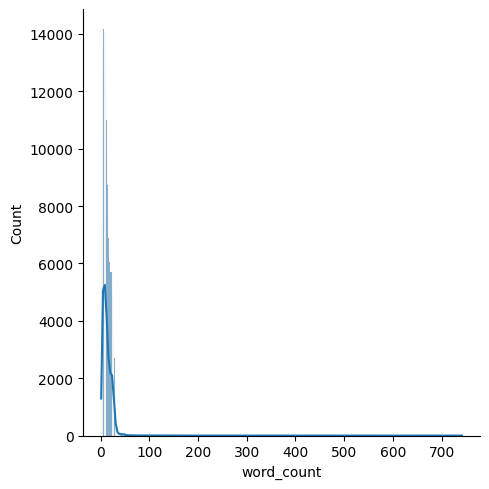

In [47]:
sns.displot(df['word_count'], kde=True)

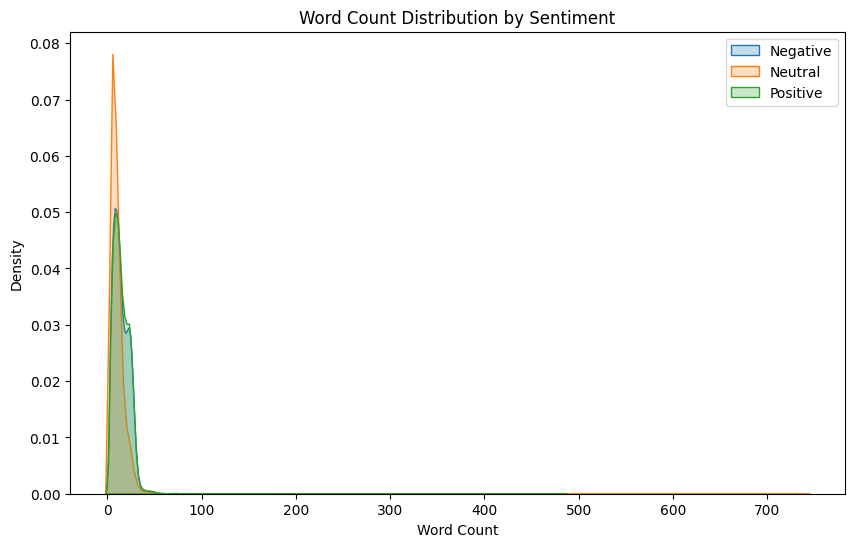

In [49]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['sentiment'] == 0]['word_count'], label='Negative', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['sentiment'] == 1]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['sentiment'] == 2]['word_count'], label='Positive', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1)**: These tend to have a distribution similar to negative comments but with a smaller proportion of longer comments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively higher frequency that are similar to the comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a wider spread in word count indicating that longer comments are common in negative sentiments.

<Axes: ylabel='word_count'>

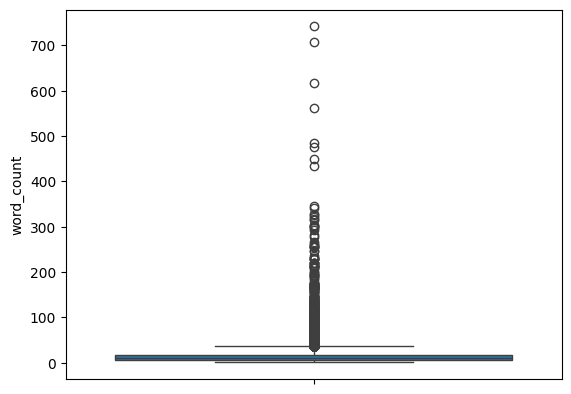

In [50]:
sns.boxplot(df['word_count'])

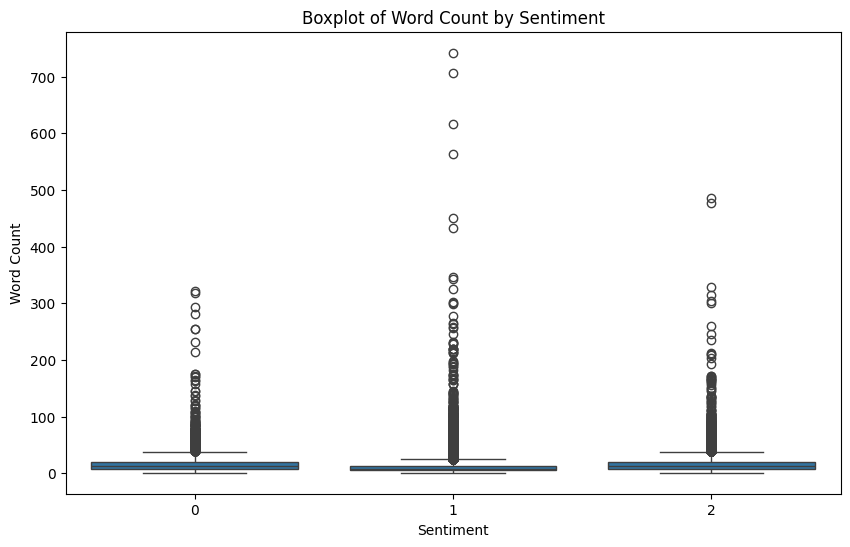

In [51]:
# Create a boxplot for the 'wordcount' column categorized by 'sentiment'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='word_count')
plt.title('Boxplot of Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

**Positive comments (sentiment 2)**: The median word count is relatively similar to that of negative comment, and there are fewer outliers with longer comments..<br>
**Neutral comments (sentiment 1)**: The median word count is the highest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (sentiment 0)**: The word count distribution is high and with a slightly similar median and fewer extreme outliers to that of positive comment indicating that negative comments tend to be more verbose.

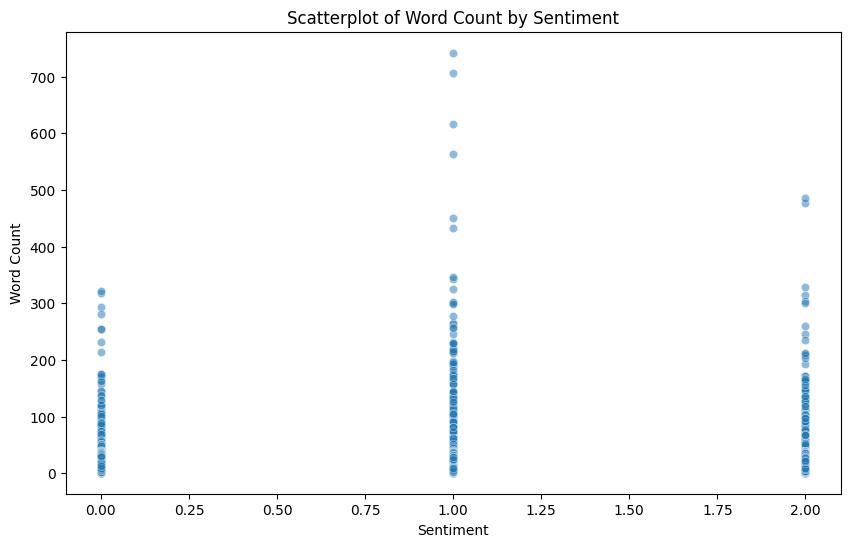

In [52]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sentiment', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='sentiment', ylabel='word_count'>

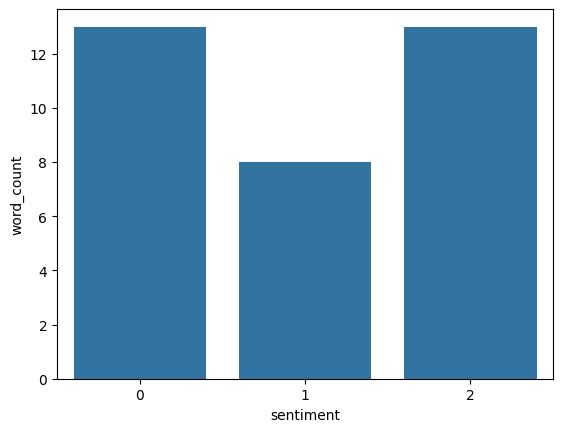

In [53]:
# median word counts among sentiments

sns.barplot(df,x='sentiment',y='word_count',estimator='median')

In [54]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Testing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [57]:
df.head()

,comment,sentiment,word_count,num_stop_words
0,lets forget apple pay required brand new iphon...,1,33,0
1,nz retailers don’t even contactless credit car...,0,18,0
2,forever acknowledge channel help lessons ideas...,2,15,0
3,whenever go place doesn’t take apple pay doesn...,0,49,0
4,apple pay convenient secure easy use used kore...,2,14,0


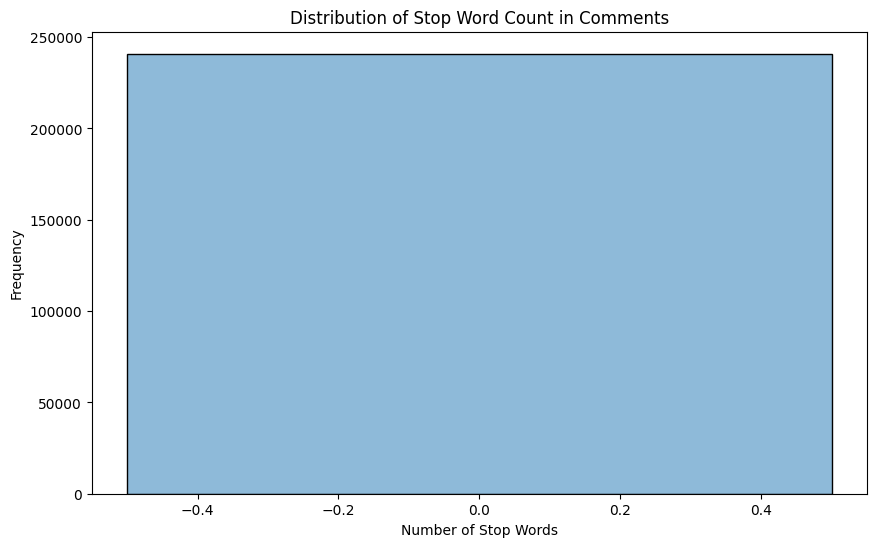

In [ ]:
# # Create a distribution plot (displot) for the 'num_stop_words' column
# plt.figure(figsize=(10, 6))
# sns.histplot(df['num_stop_words'], kde=True)
# plt.title('Distribution of Stop Word Count in Comments')
# plt.xlabel('Number of Stop Words')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# # Create the figure and axes
# plt.figure(figsize=(10, 6))

# # Plot KDE for category 1
# sns.kdeplot(df[df['sentiment'] == 0]['num_stop_words'], label='Negative', fill=True)

# # Plot KDE for category 0
# sns.kdeplot(df[df['sentiment'] == 1]['num_stop_words'], label='Neutral', fill=True)

# # Plot KDE for category -1
# sns.kdeplot(df[df['sentiment'] == 2]['num_stop_words'], label='Positive', fill=True)

# # Add title and labels
# plt.title('Num stop words Distribution by Sentiment')
# plt.xlabel('Stop word count')
# plt.ylabel('Density')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:
# median word counts among sentiments

# sns.barplot(df,x='sentiment',y='num_stop_words',estimator='median')

In [ ]:
# Create a frequency distribution of stop words in the 'comment' column
from collections import Counter

# # Extract all stop words from the comments using the previously defined 'common_stopwords'
# all_stop_words = [word for comment in df['comment'] for word in comment.split() if word in stop_words]

# # Count the most common stop words
# most_common_stop_words = Counter(all_stop_words).most_common(25)

# # Convert the most common stop words to a DataFrame for plotting
# top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
# plt.figure(figsize=(12, 8))
# sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
# plt.title('Top 25 Most Common Stop Words')
# plt.xlabel('Count')
# plt.ylabel('Stop Word')
# plt.show()

In [59]:
# Number of characters in comments

df['num_chars'] = df['comment'].apply(len)

df.head()

,comment,sentiment,word_count,num_stop_words,num_chars
0,lets forget apple pay required brand new iphon...,1,33,0,231
1,nz retailers don’t even contactless credit car...,0,18,0,113
2,forever acknowledge channel help lessons ideas...,2,15,0,114
3,whenever go place doesn’t take apple pay doesn...,0,49,0,328
4,apple pay convenient secure easy use used kore...,2,14,0,93


In [60]:
df['num_chars'].describe()

count    240928.000000
mean         87.661272
std          71.974148
min           1.000000
25%          41.000000
50%          72.000000
75%         124.000000
max        5080.000000
Name: num_chars, dtype: float64

In [61]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [62]:
char_frequency_df['character'].values

array([' ', 'e', 'a', ..., '머', '父', '둘'], dtype=object)

In [64]:
char_frequency_df.tail(10)

,character,frequency
1320,𝓵,1
1318,𝓬,1
1371,理,1
1364,호,1
1359,참,1
1358,란,1
1356,밑,1
1353,머,1
1349,父,1
1347,둘,1


In [65]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,comment,sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
4357,forgot say wait minute two coffee gets,2,7,0,38,0
183593,modi shooting arrow,1,3,0,19,0
171921,trying repackagingnever heard angel tax upaare...,1,12,0,100,0
64838,bc catnappedcats always weird dreams,0,5,0,36,0
217729,problem mama modi haters restless dying get po...,1,9,0,56,0


In [66]:
df['num_punctuation_chars'].describe()

count    240928.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\Testing\AppData\Local\Temp\ipykernel_23488\2076968086.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


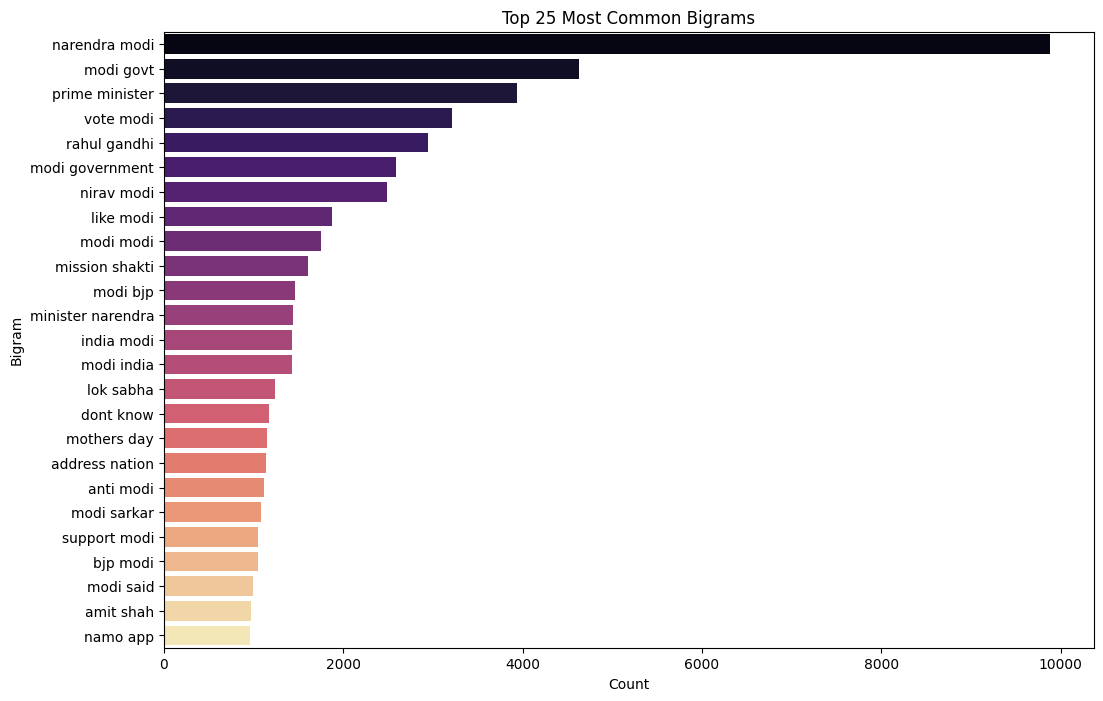

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\Testing\AppData\Local\Temp\ipykernel_23488\585112789.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


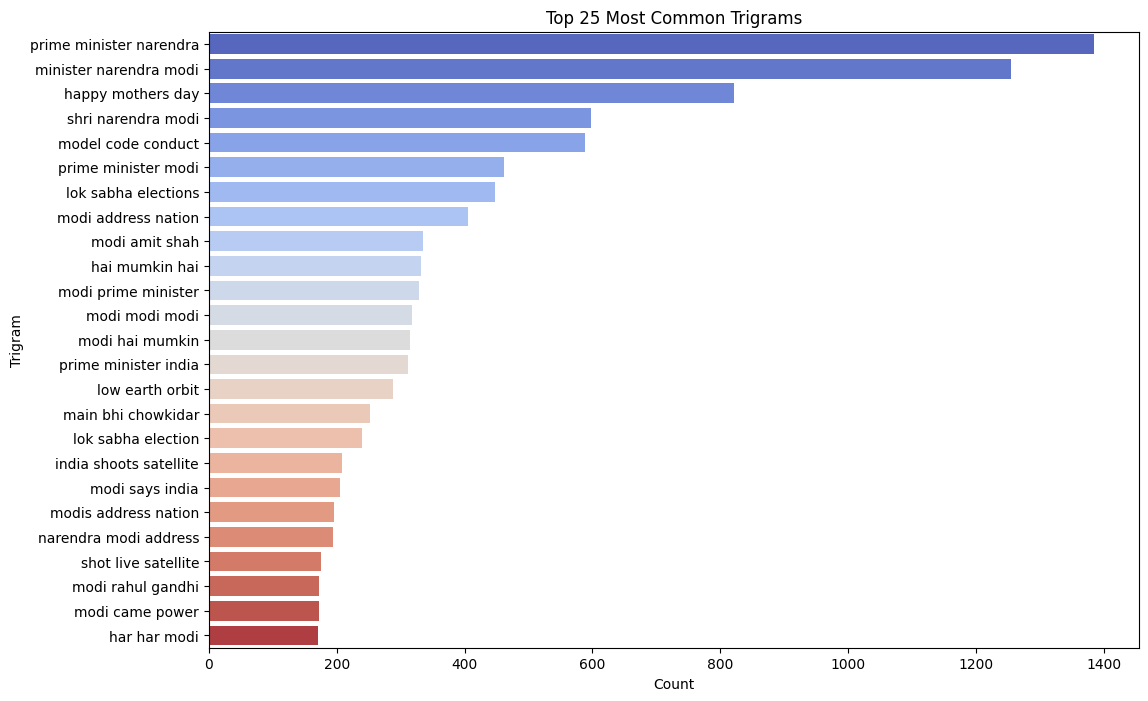

In [68]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [69]:
# Remove non-English characters from the 'comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['comment'] = df['comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [70]:
all_text = ' '.join(df['comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,3133194
1,e,2011609
9,a,1544619
14,i,1533948
6,o,1319629
17,n,1288658
2,t,1252531
3,s,1230917
7,r,1094887
15,d,893897


In [71]:
df.head()

,comment,sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets forget apple pay required brand new iphon...,1,33,0,231,0
1,nz retailers dont even contactless credit card...,0,18,0,113,0
2,forever acknowledge channel help lessons ideas...,2,15,0,114,0
3,whenever go place doesnt take apple pay doesnt...,0,49,0,328,0
4,apple pay convenient secure easy use used kore...,2,14,0,93,0


In [72]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'comment' column, retaining essential ones
df['comment'] = df['comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [73]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'comment_no_stopwords' column
df['comment'] = df['comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Testing\AppData\Roaming\nltk_data...


,comment,sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,let forget apple pay required brand new iphone...,1,33,0,231,0
1,nz retailer dont even contactless credit card ...,0,18,0,113,0
2,forever acknowledge channel help lesson idea e...,2,15,0,114,0
3,whenever go place doesnt take apple pay doesnt...,0,49,0,328,0
4,apple pay convenient secure easy use used kore...,2,14,0,93,0


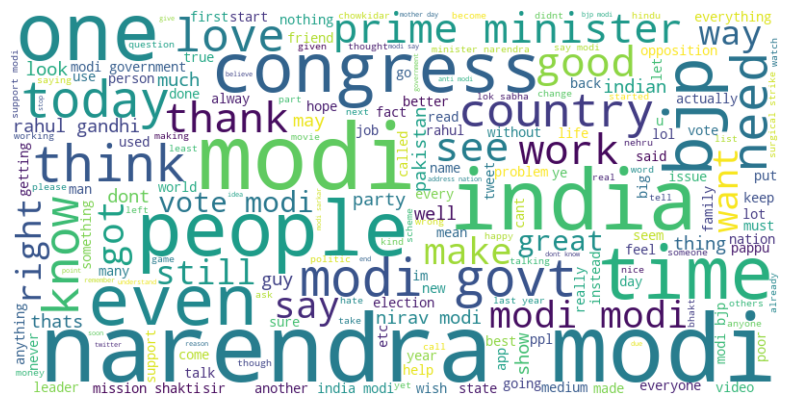

In [77]:
from wordcloud import WordCloud
# import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['comment'])

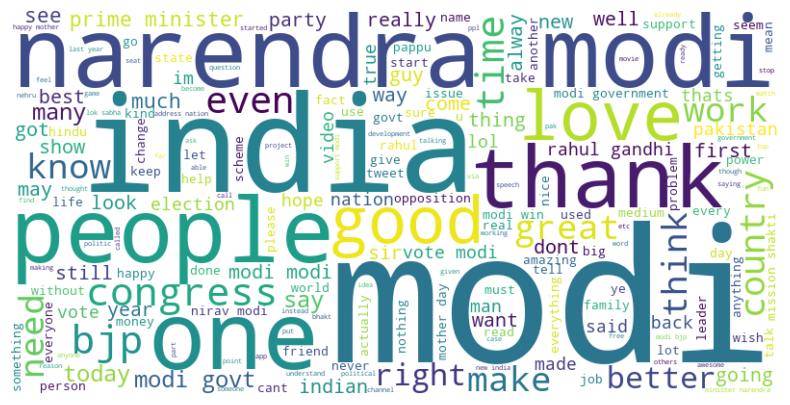

In [78]:

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['sentiment'] == 2]['comment'])

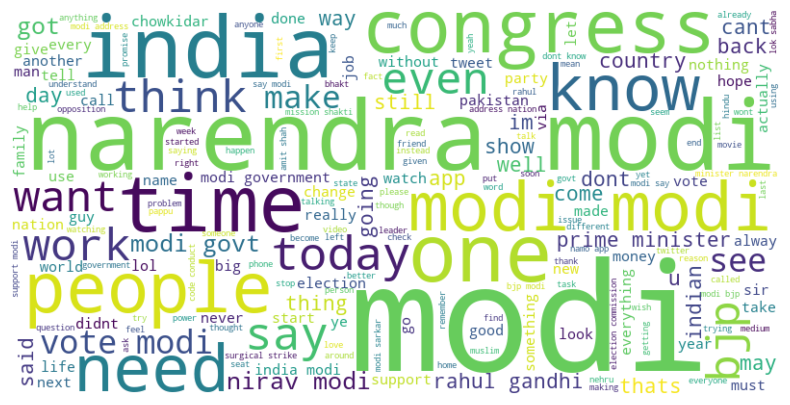

In [79]:

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['sentiment'] == 1]['comment'])

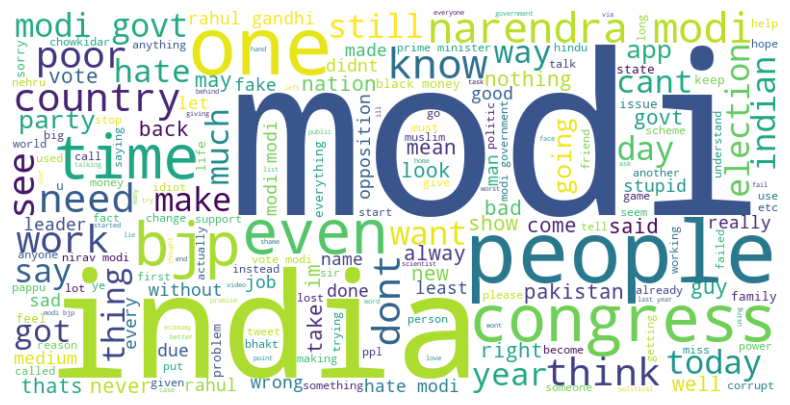

In [80]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['sentiment'] == 0]['comment'])

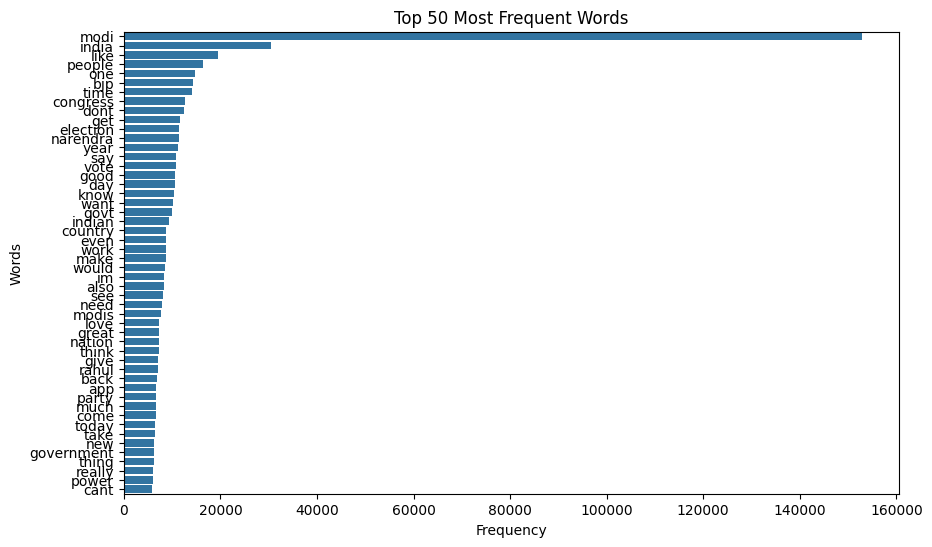

In [81]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

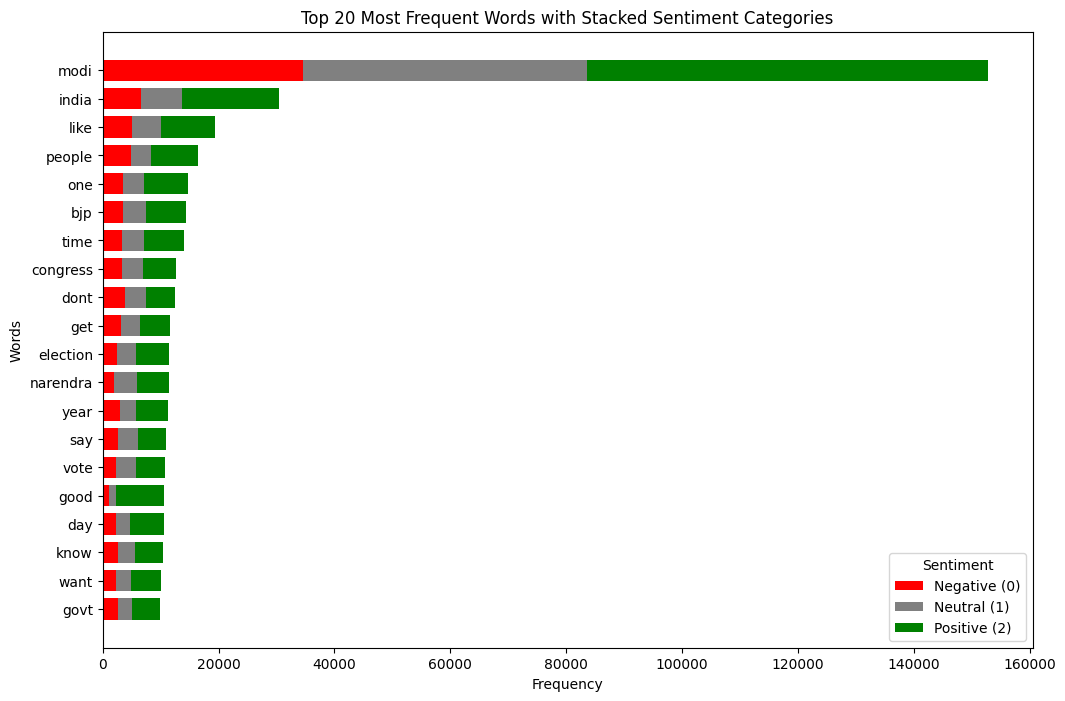

In [82]:
def plot_top_n_words_by_sentiment(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_sentiment_counts = {}

    for idx, row in df.iterrows():
        words = row['comment'].split()
        sentiment = row['sentiment']  # Assuming 'sentiment' column exists for 0, 1, 2 labels

        for word in words:
            if word not in word_sentiment_counts:
                word_sentiment_counts[word] = { 0: 0, 1: 0, 2: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_sentiment_counts[word][sentiment] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_sentiment_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

     # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_sentiment_counts[word][0] for word in top_words]
    neutral_counts = [word_sentiment_counts[word][1] for word in top_words]
    positive_counts = [word_sentiment_counts[word][2] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (0)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (1)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (2)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_sentiment(df, n=20)